# **<font color='blue'>Police Fatalities In U.S.A: 2000-2016</font>**

---

## <font color='blue'>Project's number:</font> 25
### <font color='blue'>Presenters's names: </font> Niv Harel, Dvir Amitay, Eyal Kadosh, Oshri Tasama, Haim Amzallag.
###### Source : https://www.kaggle.com/datasets/rishidamarla/individuals-killed-by-the-police

In [11]:
from IPython.core.display import Image, display
display(Image(url='https://raw.githubusercontent.com/nivrl/Data-Science/main/D2ILN4H6FNFLZDWFRMROTX6KPM.jpg', width=800, unconfined=True))

## <font color='blue'>The Dataset:</font>

---

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
url1= "https://raw.githubusercontent.com/nivrl/Data-Science/main/Police%20Fatalities%20_new.csv"
df = pd.read_csv(url1, encoding = "ISO-8859-1")
df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [14]:
len(df)

12491

In [15]:
df.isnull().sum().sort_values(ascending=False)

Armed              5677
Race               3965
Age                 233
Gender                8
City                  4
UID                   0
Name                  0
Date                  0
State                 0
Manner_of_death       0
Mental_illness        0
Flee                  0
dtype: int64

In [16]:
df.dtypes

UID                  int64
Name                object
Age                float64
Gender              object
Race                object
Date                object
City                object
State               object
Manner_of_death     object
Armed               object
Mental_illness        bool
Flee                  bool
dtype: object

In [17]:
print("How many had mental illness?" , len(df[df["Mental_illness"] == True]))
print("How many Fled?" , len(df[df["Flee"] == True]))

How many had mental illness? 2629
How many Fled? 560


#### Observation- just for understanding the data:

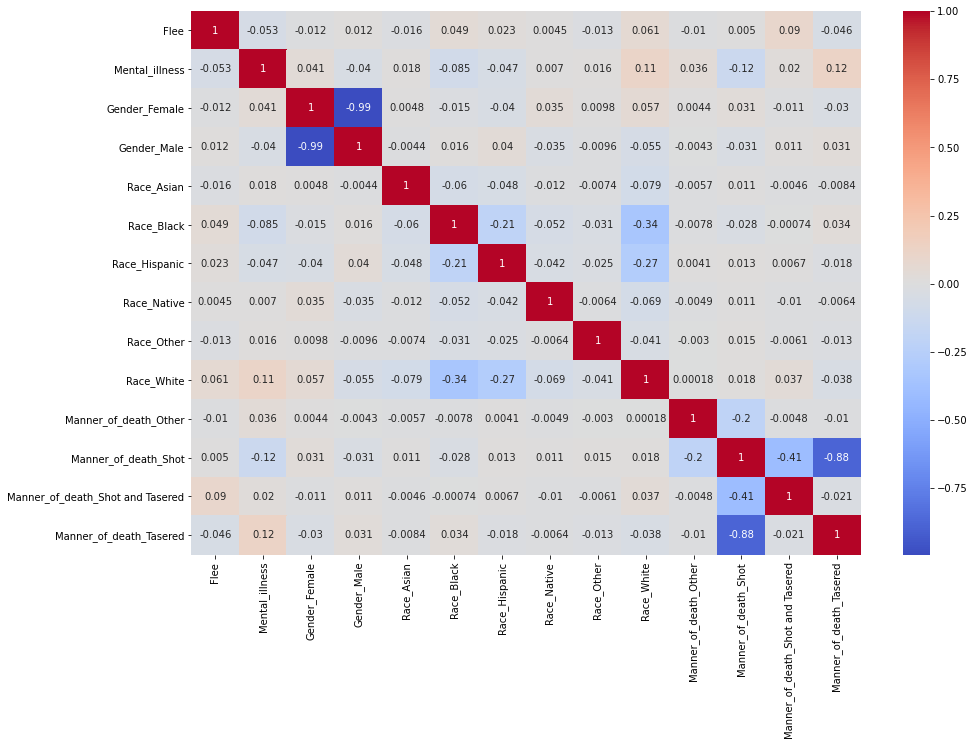

In [18]:
f= ["Gender","Race","Manner_of_death", "Flee", "Mental_illness"]
new_df = pd.get_dummies(df[f])
new_df[["Flee", "Mental_illness"]]= new_df[[ "Flee", "Mental_illness"]].astype(int)
corrs = new_df.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

>##### We could not conclude significant information from the correlation table.

In [19]:
df_counter = df.rename(columns = {"UID": "Fatalities"})
df_counter["Armed"].fillna("Unknown",inplace = True)
df_counter["Race"].fillna("Unknown",inplace = True)
df_counter["Gender"].fillna("Unknown",inplace = True)
df_counter["City"].fillna("Unknown",inplace = True)

## <font color='blue'>Gender Analysis:</font>

---

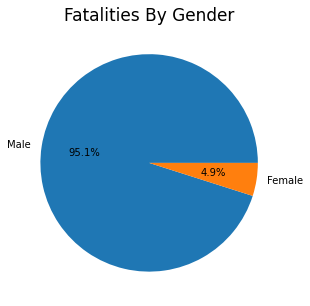

In [20]:
gender = df_counter[df_counter["Gender"] != "Unknown"]
plt.figure(1, figsize=(5,5))
plt.title("Fatalities By Gender", size = 17)
gender['Gender'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

In [21]:
df.pivot_table(['Age'], 'Gender')

,Age
Gender,
Female,37.680921
Male,35.148304


## <font color='blue'>Race Analysis:</font>

---

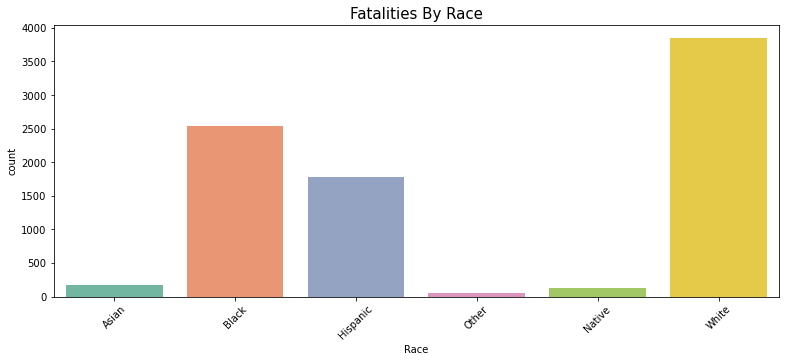

In [22]:
plt.figure(figsize = (13,5))
race_general = df_counter[df_counter["Race"] != "Unknown"]
ax= sns.countplot(data = race_general, x = "Race", palette = 'Set2')
plt.xticks(rotation=45)
ax.set_title('Fatalities By Race', size=15)
plt.show()

>##### It can be easly seen that a lot more white people were killed than blacks and from any other race, which is suprising.
>##### But after further invstagion we found that it is not comparative beacuse there are far more white people in the US than there are blacks. only 1 of 50,000 whites were killed by the police, while 1 of 17,000 black people were killed.

## <font color='blue'>Age Analysis:</font>

---

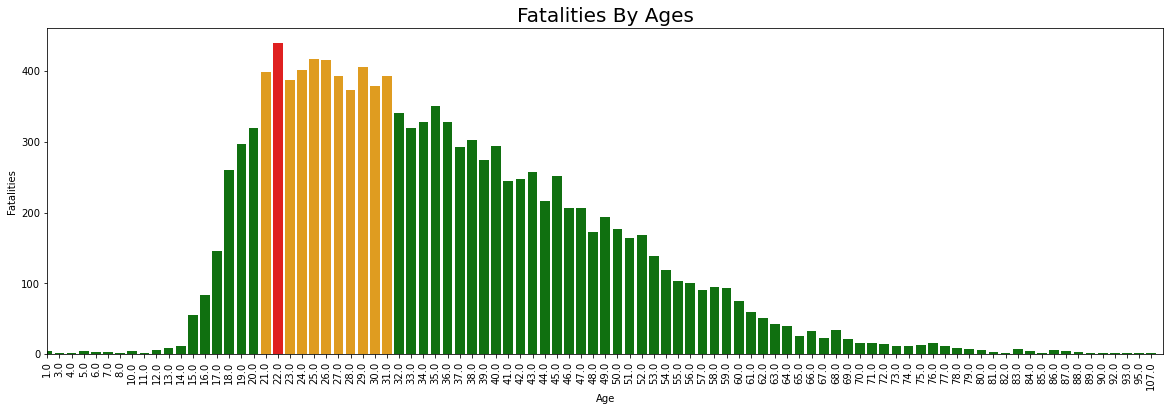

In [23]:
age = df_counter.groupby("Age")[["Fatalities"]].count().reset_index()
plt.figure(figsize = (20,6))
color = ['orange' if x  > 350 and x < 425 else "red" if x > 425 else 'green' for x in age.Fatalities]
ax = sns.barplot(data = age, x = 'Age', y = 'Fatalities', palette = color) 
ax.set_title('Fatalities By Ages', size=20)
ax.set_xlim(0,92)
plt.xticks(rotation = 90)
plt.show()

In [24]:
age = pd.cut(df_counter['Age'], [0,10,20,30,40,50,60,70,80,90,108]) 
df_counter.groupby(age).count()[["Fatalities"]]

,Fatalities
Age,
"(0, 10]",24
"(10, 20]",1187
"(20, 30]",4010
"(30, 40]",3222
"(40, 50]",2171
"(50, 60]",1148
"(60, 70]",344
"(70, 80]",116
"(80, 90]",32


>##### We can see that ages 21-30 are with the higher risk of getting murdered by cops, and 22 in particular is with the highest percentage.

In [25]:
df_counter["Age"].max()

107.0

In [26]:
df_counter["Age"].min()

1.0

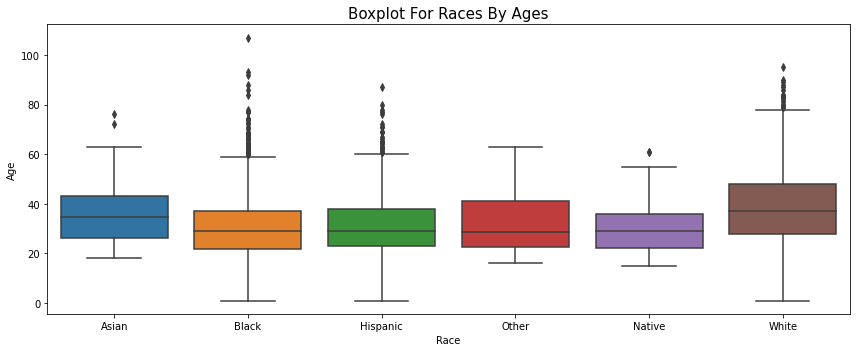

In [59]:
plt.figure(figsize = (12,5))
ax = sns.boxplot(data= race_general, x = "Race", y = 'Age');
ax.set_title('Boxplot For Races By Ages', size=15)
plt.show()

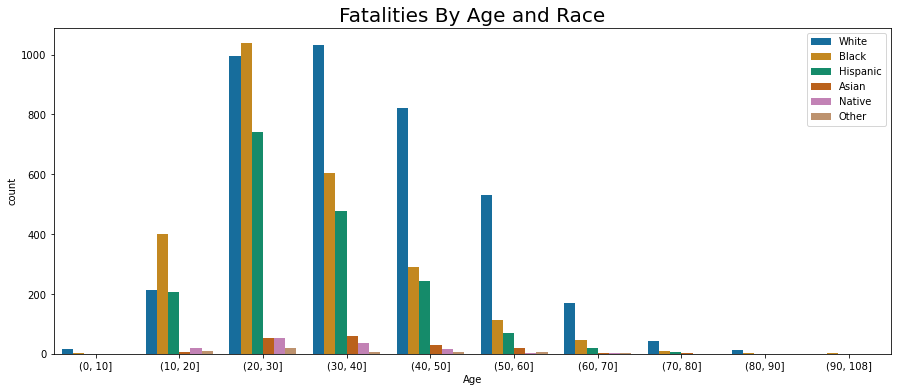

In [28]:
plt.figure(figsize = (15,6))
age = pd.cut(race_general['Age'], [0,10,20,30,40,50,60,70,80,90,108]) 
ax = sns.countplot(data = race_general, x = age, hue = "Race", palette = 'colorblind', hue_order =["White", "Black", "Hispanic","Asian","Native","Other"]);
ax.set_title('Fatalities By Age and Race', size=20)
plt.legend(loc='upper right')
plt.show()

>##### Suprisingly, although there are more white adults killed, in the early ages there are more blacks killed.

<div>
<img src="https://raw.githubusercontent.com/nivrl/Data-Science/main/11016837_664592850335216_1684473015226945077_n-e1428922480902-256x256.jpeg" width="400"/>
</div>

#### Age 22:

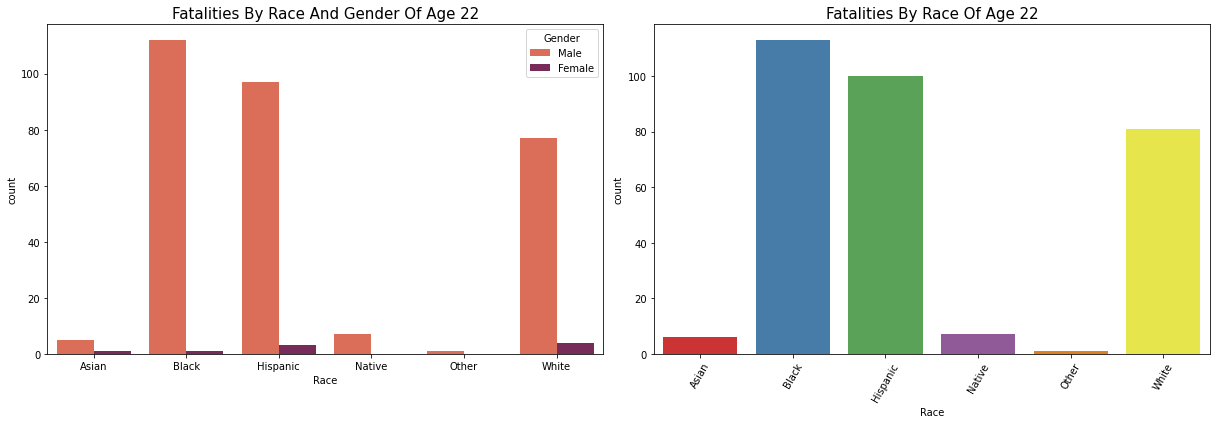

In [29]:
age_22 = df_counter[(df_counter["Age"] == 22) & (df_counter['Race'] != "Unknown")]
plt.rcParams["figure.figsize"] = [17, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
ax1= sns.countplot(data = age_22, x = "Race", hue = "Gender", ax = axes[0], palette = "rocket_r")
ax1.set_title('Fatalities By Race And Gender Of Age 22', size=15)
ax2 = sns.countplot(data = age_22, x = "Race", ax = axes[1],  palette = "Set1")
ax2.set_title('Fatalities By Race Of Age 22', size=15)
plt.xticks(rotation=60)
plt.show()

>##### In the right plot we can see that even though there are more whites murdered overall, in the age of 22 there are more blacks and also hispanic fatalities than whites.

## <font color='blue'>Years And Months Analysis:</font>

---

### Years Analysis:

In [30]:
df_counter['Date'] = pd.to_datetime(df['Date'])
df_counter['Year'] = pd.DatetimeIndex(df['Date']).year
df_counter["Month"] = pd.DatetimeIndex(df['Date']).month

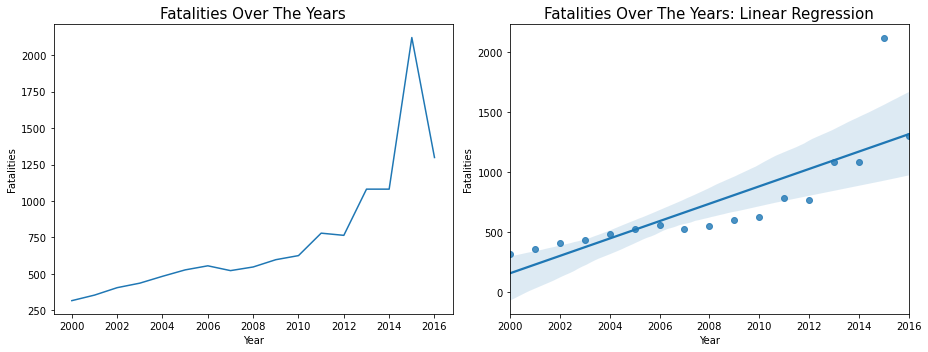

In [31]:
plt.rcParams["figure.figsize"] = [13, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
years = df_counter.groupby("Year").count().reset_index()
years_plot = sns.lineplot(data = years, x = "Year", y = "Fatalities", ax = axes[0])
years_plot.set_title('Fatalities Over The Years', size=15)
reg_years = sns.regplot(data = years, x = "Year", y = "Fatalities", ax = axes[1])
reg_years.set_title('Fatalities Over The Years: Linear Regression', size=15)
plt.show()

>##### As we can see, there are more and more incidents each year.

### Months Analysis:

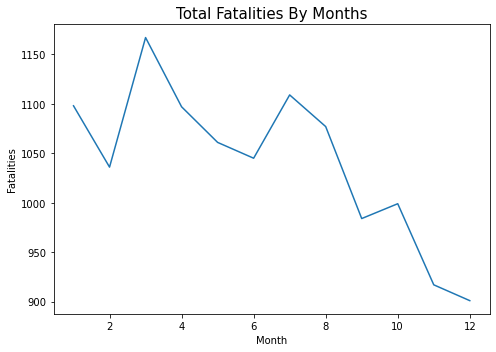

In [32]:
months_generally = df_counter.groupby("Month").count().reset_index()
plt.figure(figsize = (7,5))
ax= sns.lineplot(data = months_generally, x = "Month", y = "Fatalities")
ax.set_title("Total Fatalities By Months", size =15)
plt.show()

>##### March and August are the months with the higest amounts of fatalities, which is worth checking by the police (we couldn't find the reasons for that).

#### What Happened in 2016?

In [33]:
ex = df_counter[df_counter["Year"] == 2016].copy()
ex['Month'] = pd.DatetimeIndex(ex['Date']).month
ex.Month.unique()

array([ 1,  3,  4,  5,  6,  7, 10,  2,  8,  9, 11])

>##### Missing months that was not recoreded, probably. In addition.
>##### Still, there were more fatlities that year than the previous years (except 2015).

#### What Happend in 2015 ??

In [34]:
year_15 = df_counter[df_counter["Year"] == 2015].copy()
month_15 = year_15.groupby("Month").count().reset_index()

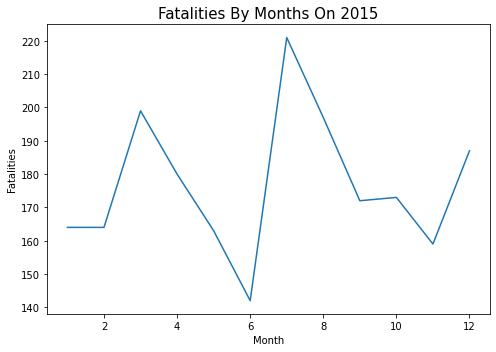

In [35]:
plt.figure(figsize = (7,5))
ax = sns.lineplot(data = month_15, x = "Month", y = "Fatalities")
ax.set_title("Fatalities By Months On 2015", size =15)
plt.show()


>* 12.3.15 - Jeffrey Williams, 20, is accused of shooting two police officers during a protest outside Police Headquarter.
>* 16.7.15 - An armed man opened fire on two military installations in Chattanooga, Tennessee, Five Marines died and two more  were injurded.   
##### We can asume that these extreme occations caused the law inforcment to retalite and to be on high alert, with a "quick finger on the trigger" causing a massive fatatlites increase in that year.

## <font color='blue'>Armed Analysis:</font>


---

In [36]:
armed = df_counter.groupby("Armed").count().reset_index().sort_values(by = "Fatalities", ascending = False).iloc[1:,:]
armed.head(7)[["Armed","Fatalities"]]

,Armed,Fatalities
20,Gun,4703
27,Knife,1361
56,Unarmed,400
59,Vehicle,111
54,Toy Weapon,69
55,Toy weapon,29
29,Machete,16


In [37]:
df_counter['Armed'] = df_counter['Armed'].str.replace("Toy weapon","Toy Weapon")
armed = df_counter.groupby("Armed").count().reset_index().sort_values(by = "Fatalities", ascending = False).iloc[1:,:]

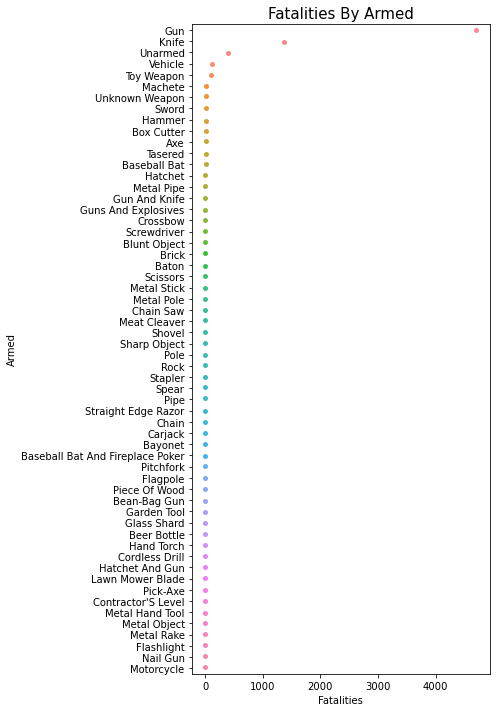

In [38]:
plt.figure(figsize = (7,10))
armed_plot = sns.stripplot(x="Fatalities", y="Armed", data=armed)
armed_plot.set_title('Fatalities By Armed', size=15)
plt.show()

#### Toy Weapons:

In [39]:
toys = df_counter[df_counter["Armed"]== "Toy Weapon"]
len(toys)

98

In [40]:
print("[(Mental illness and Toy weapon) / (Toy weapon)] = ", len(toys[toys.Mental_illness == True])/ len(toys))

[(Mental illness and Toy weapon) / (Toy weapon)] =  0.32653061224489793


In [41]:
print("The average age of fatalities armed with a toy weapon:", toys["Age"].mean())

The average age of fatalities armed with a toy weapon: 34.91836734693877


>##### Just 32% from the fatalities armed with toy weapon had mental illness!
##### We can not advise the police how to handle those situations, but it is necessary that they will be familiar with this information (because those people armed with a toy weapon couldn't harm others).

#### Unarmed:

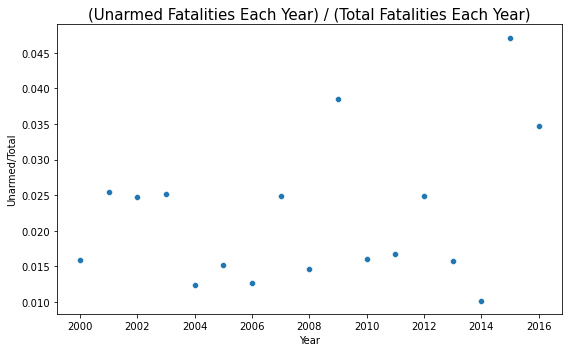

In [42]:
plt.figure(figsize = (8,5))
unarmed = df_counter[(df_counter["Armed"] == "Unarmed") & (df_counter['Race'] != "Unknown")]
unarmed_by_year = unarmed.groupby("Year")[["Fatalities"]].count().reset_index()
unarmed_by_year["Unarmed/Total"] = unarmed_by_year["Fatalities"] / years["Fatalities"]
plot = sns.scatterplot(data = unarmed_by_year, x = "Year" , y = "Unarmed/Total")
plot.set_title('(Unarmed Fatalities Each Year) / (Total Fatalities Each Year)', size=15);
plt.show()

>##### Strongly correlate with our speculations about 2015.

In [43]:
blacks = df_counter[df_counter["Race"] == "Black"]
stats_by_year = unarmed.groupby("Year").count()[["Fatalities"]]
stats_by_year["Blacks"] = blacks.groupby("Year").count()[["Fatalities"]]
stats_by_year = stats_by_year.rename(columns = {"Fatalities" : "Unarmed"})

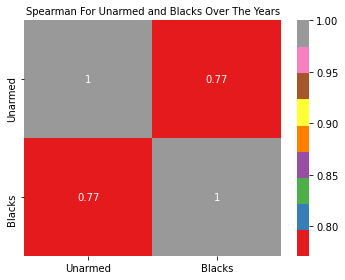

In [44]:
plt.figure(figsize = (5,4))
corr_matrix1 = stats_by_year.corr("spearman")
pearson = sns.heatmap(data = corr_matrix1,cmap = "Set1",annot = True);
pearson.set_title('Spearman For Unarmed and Blacks Over The Years', size=10)
plt.show()

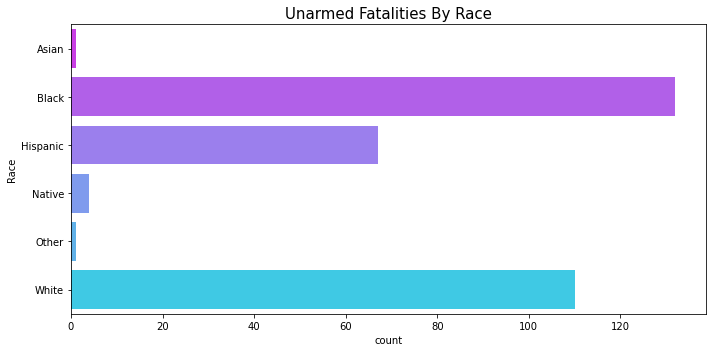

In [45]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data = unarmed, y = "Race", palette = "cool_r")
ax.set_title('Unarmed Fatalities By Race', size=15)
plt.show()

>##### We can see a high correlation between blacks killed and unarmed killed over the years.
>##### More over we can see that even though there's far more white fatalities than blacks , there are more black unarmed fatalities than white unarmed fatalities. 

<div>
<img src="https://raw.githubusercontent.com/nivrl/Data-Science/main/f2799ddffd7dd27bfa1e00b1e1756c44.jpg" width="700"/>
</div>

## <font color='blue'>Manner Of Death Analysis:</font>


---

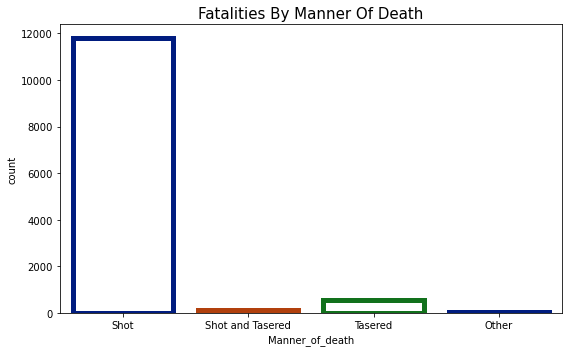

In [46]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df_counter , x = "Manner_of_death", facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
ax.set_title('Fatalities By Manner Of Death', size=15)
plt.show()

In [47]:
taser = df_counter[df_counter["Manner_of_death"] == "Tasered"]
print("How many were tasered?" ,len(taser))
num = len(taser[taser["Mental_illness"] == True])
s = f"How many were tasered and had mental illness? {num}/{len(taser)} = {num/len(taser)}"
print(s)

How many were tasered? 542
How many were tasered and had mental illness? 240/542 = 0.44280442804428044


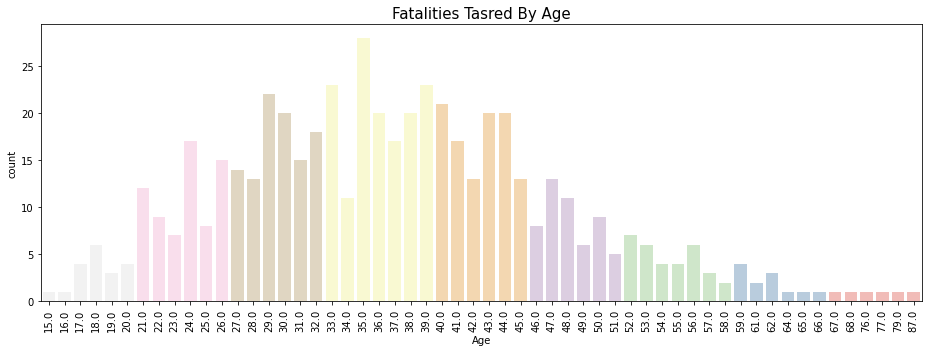

In [48]:
ax = sns.countplot(data = taser , x = "Age", palette = "Pastel1_r")
ax.set_title('Fatalities Tasred By Age', size=15)
plt.xticks(rotation = 90)
plt.show()

In [49]:
mean = taser["Age"].mean()
print("What is the mean of all the ages who tasered?" ,mean)

What is the mean of all the ages who tasered? 37.134078212290504


>##### Suprisingly most dead by taser were not in the age of 60 plus.

## <font color='blue'>Cities Analysis:</font>

---

In [50]:
cities= df_counter.groupby("City").count().loc[:,["Fatalities"]]
cities

,Fatalities
City,
"""El Paso, Cuidad Juarez""",1
"""Grand Boulevard, Chicago""",1
"""South Shore, Chicago""",1
"""West Town, Chicago""",1
3524 N. Kingshighway Blvd.,1
...,...
Zumbrota,1
between Staunton and Fishersville,1
las Vegas,1


In [51]:
cities.sort_values(by = "Fatalities", ascending = False)

,Fatalities
City,
Los Angeles,297
Houston,247
Phoenix,177
Chicago,175
Las Vegas,153
...,...
Indian Shores,1
Indian Township,1
Indian Trail,1


In [52]:
print("How many unique values in the city's column?", len(df_counter.City.unique()))

How many unique values in the city's column? 3328


>##### Because there are too many unique and complicated cities values, we have decided to ignore this information.

## <font color='blue'>States Analysis:</font>
___

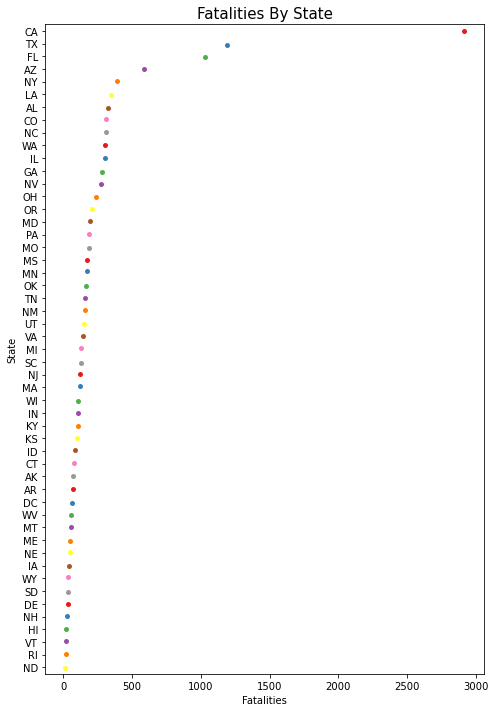

In [53]:
plt.figure(figsize = (7,10))
states = df_counter.groupby("State").count().sort_values(by = "Fatalities", ascending = False).reset_index()
states_plot = sns.stripplot(x="Fatalities", y="State", data=states, palette = 'Set1')
states_plot.set_title('Fatalities By State', size=15)
plt.show()

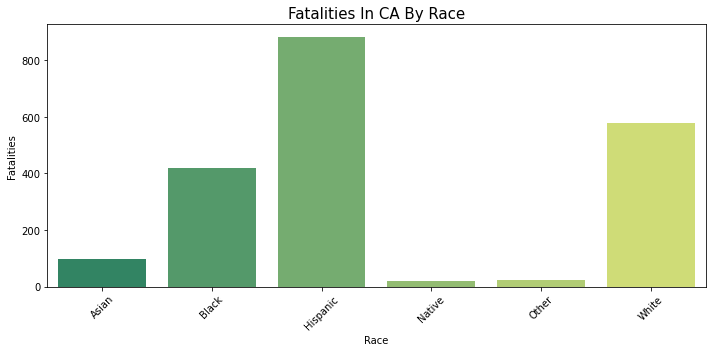

In [54]:
plt.figure(figsize = (10,5))
ca = df_counter[df_counter["State"] == "CA"]
fat_ca = ca.groupby("Race").count().reset_index()[["Race","Fatalities"]]
fat_ca = fat_ca[fat_ca['Race'] != "Unknown"]
ax = sns.barplot(data = fat_ca, x = "Race",y = "Fatalities", palette = "summer")
ax.set_title('Fatalities In CA By Race', size=15)
plt.xticks(rotation=45)
plt.show()

>##### In California there are a lot more Hispanic fatalities than white fatalities, even though they share the same portion of california's population (roughly 38% each).

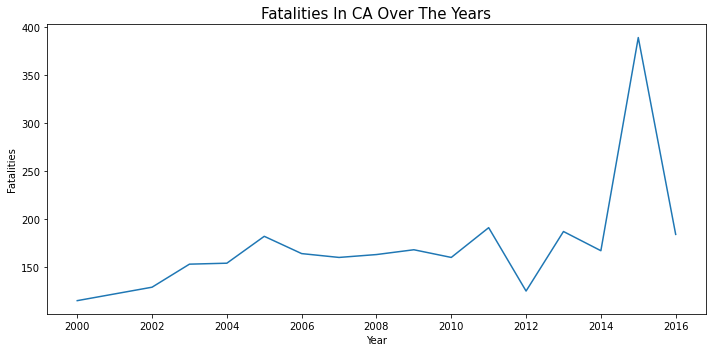

In [55]:
plt.figure(figsize = (10,5))
years_ca = ca.groupby("Year").count().reset_index()
ax = sns.lineplot(data = years_ca, x = "Year", y = "Fatalities")
ax.set_title('Fatalities In CA Over The Years', size=15)
plt.show()

In [56]:
ca.groupby("Armed").count().sort_values(by = "Fatalities", ascending = False).iloc[1:,0:1].head()

,Fatalities
Armed,
Gun,857
Knife,355
Unarmed,93
Vehicle,22
Toy Weapon,18


# <font color='blue'>Conclusions and insights:</font>
___

<div>
<img src="https://raw.githubusercontent.com/nivrl/Data-Science/main/merlin_137575770_9bc147c2-faff-433b-83f8-2b6c44293b67-superJumbo.jpg" width="700"/>
</div>

## Main conclusions for the police:

1. In a first glance on the data we can see that as oppose to the common belief, the police does not tend to discriminate the African-American community in the US. The proof is that there are far more white fatalities than black fatalities.  But this information isn't accurate, using profound analysis we discovered that there are far more white people than blacks in the entire US. More over we saw a distinct connection between unarmed fatalities and blacks killed. In addition more young African-American fatalities than any other race, so that is something the police should examine thoroughly.

2. In 2015 there was a massive growth of fatalities by the police, that can be explained by the a number of shooting incidents against law enforcements across the US. these events probably cauesed police officers to have a "light finger on the trigger". In addition, another information that supports this presumption  is the high number of unarmed fatalities in said year. This should lead the police to reflect on the question: are those events justifiable or not?
                        
3. We know that the purpuse of the taser gun is to neutralize a threat and not to kill. Nevertheless, from our analysis we can understand that there are over 500 cases of fatalities by a taser gun (regardless to the fatalities's ages), therefore there is a clear need to find a diffrent tool to uphold it's true purpose.


## Conclusions for education organizations and rehabilitation organizations for delinquent youth:
If we would classify the events in the data as criminal incidents from which one can learn about the crime in the US, we can say that 22 is the age which has the highest tendency for crime, and the weaker population at this age is more affected (and this can also be seen between the ages of 10-20).Therefore action must be taken to eradicate The delinquency mainly in those races at this significant ages in the adolescence. Moreover, in California, the Hispanic population also leads the number of criminal incidents, which means that education and rehabilitation organizations must place special emphasis on the underprivileged populations. 

# <font color='green'>Thank you!</font>

---